<a href="https://colab.research.google.com/github/leon-sihlongonyane/R/blob/main/leon-data-science-pac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monday 3rd Jan 2022

Regression tree practical

On the left, click on the folder icon and upload the boston.csv file.

## Task

Create a regression tree using the boston.csv data. Upload the data. Fill in the blanks accordingly.

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Read in the data

In [5]:
# load dataset
df = pd.read_csv("boston.csv")

In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Print the number of rows in the dataset.
Expected value is 506

In [8]:
len(df)

506

## Create X and y variables (features and target)

In [9]:
feature_cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
X = df[feature_cols] # Features
y = df.medv # Target variable

In [10]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [11]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

## Split data into training and testing

In [12]:
# Set 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, train_size=0.7, random_state=10)

## Whenever you do some data manipulation, you should always check the resulting data

Get the shape of the training features.
Expected value is (354, 13)

In [14]:
X_train.shape

(354, 13)

Get the shape of the training targets.
Expected value is (354,)

In [15]:
y_train.shape

(354,)

Get the shape of the testing features.
Expected value is (152, 13)

In [16]:
X_test.shape

(152, 13)

Get the shape of the testing targets.
Expected value is (152,)

In [18]:
y_test.shape

(152,)

## Use scikit-learn to create the regression tree classifier.

API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [19]:
# Create regression tree classifier using the mean squared error criterion 
# and set a maximum depth of 3
reg_tree = DecisionTreeRegressor(criterion='squared_error',max_depth =3)

# Train Decision Tree Classifer on the training data
reg_tree = reg_tree .fit(X_train,y_train)


#Predict the targets for test dataset
y_pred = reg_tree.predict(X_test)

## Evaluate on testing data

In [23]:
# Compare the model predictions to the true values on the test data
# use the mean squared error metric from scikit learn which you will have to import too!

print("MSE:",mean_squared_error(y_test, y_pred))

Loss: 26.998601567814937


## Visualise the decision tree

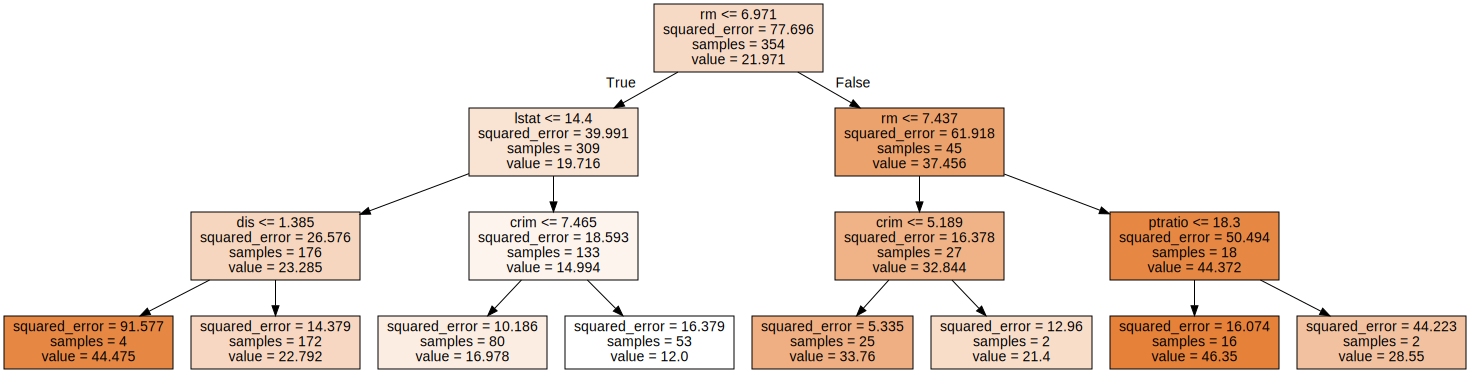

In [24]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(reg_tree, out_file=None, 
                                feature_names=feature_cols,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Task

Print out the regression tree in text form. See this tutorial https://mljar.com/blog/visualize-decision-tree/ and scroll down to where it says "Visualizing the Decision Tree in Regression Task". The first example shows you how to print the tree in text form

In [25]:
text_representation = tree.export_text(reg_tree)
print(text_representation)

|--- feature_5 <= 6.97
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [44.48]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.79]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 7.46
|   |   |   |--- value: [16.98]
|   |   |--- feature_0 >  7.46
|   |   |   |--- value: [12.00]
|--- feature_5 >  6.97
|   |--- feature_5 <= 7.44
|   |   |--- feature_0 <= 5.19
|   |   |   |--- value: [33.76]
|   |   |--- feature_0 >  5.19
|   |   |   |--- value: [21.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 18.30
|   |   |   |--- value: [46.35]
|   |   |--- feature_10 >  18.30
|   |   |   |--- value: [28.55]

